# Preprocessing

In [1]:
# Load dataset
import pandas as pd
data = pd.read_csv("creditcard.csv")

In [2]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Find null values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [4]:
# Columns summary
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
# 4. Crosstab for relationships
print(pd.crosstab(data['Class'], data['Amount'].apply(lambda x: 'High' if x > 100 else 'Low')))

Amount   High     Low
Class                
0       56378  227937
1         130     362


# EDA

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Dataset info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# Number of unique values
print(data.nunique())

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64


In [9]:
# Duplicated rows
print("Duplicated rows:", data.duplicated().sum())

Duplicated rows: 1081


In [10]:
# Remove duplicates
data = data.drop_duplicates()

In [11]:
# Confirm duplicates are removed
print("Duplicated rows after removal:", data.duplicated().sum())

Duplicated rows after removal: 0


In [12]:
# Descriptive statistics
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


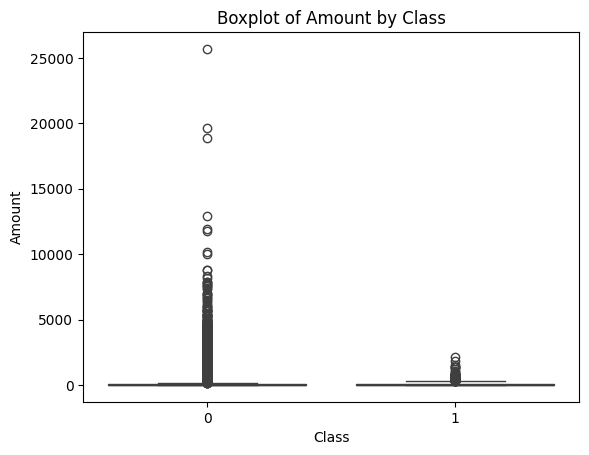

In [13]:
# Boxplot
sns.boxplot(data=data, x='Class', y='Amount')
plt.title("Boxplot of Amount by Class")
plt.show()

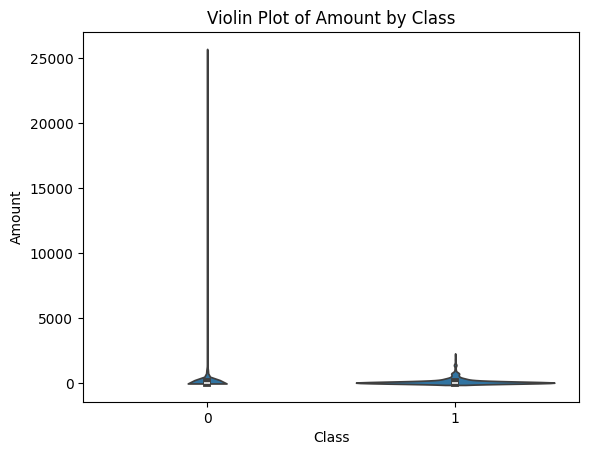

In [14]:
# Violin plot
sns.violinplot(data=data, x='Class', y='Amount')
plt.title("Violin Plot of Amount by Class")
plt.show()

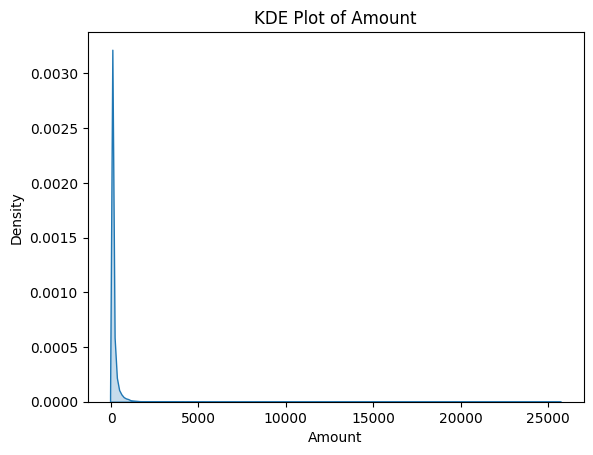

In [15]:
# KDE plot
sns.kdeplot(data['Amount'], fill=True)
plt.title("KDE Plot of Amount")
plt.show()

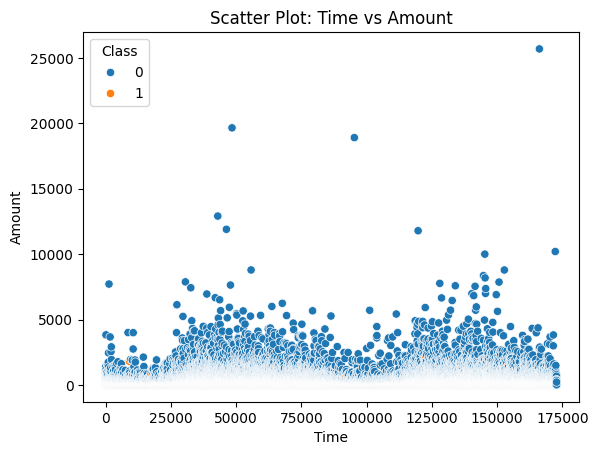

In [16]:
# Scatter plot
sns.scatterplot(data=data, x='Time', y='Amount', hue='Class')
plt.title("Scatter Plot: Time vs Amount")
plt.show()

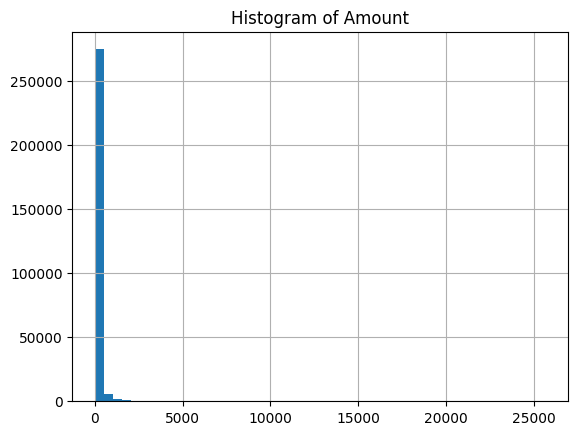

In [17]:
# Histogram
data['Amount'].hist(bins=50)
plt.title("Histogram of Amount")
plt.show()

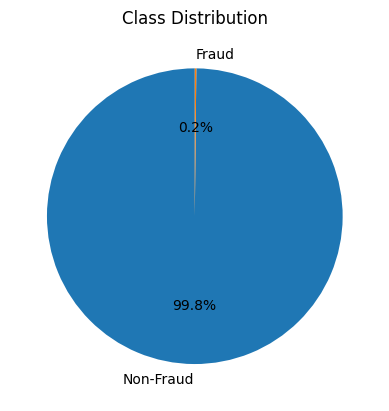

In [18]:
# Pie chart for class distribution
data['Class'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Non-Fraud', 'Fraud'], startangle=90)
plt.title("Class Distribution")
plt.ylabel("")  # Hide y-label
plt.show()

In [19]:
data['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

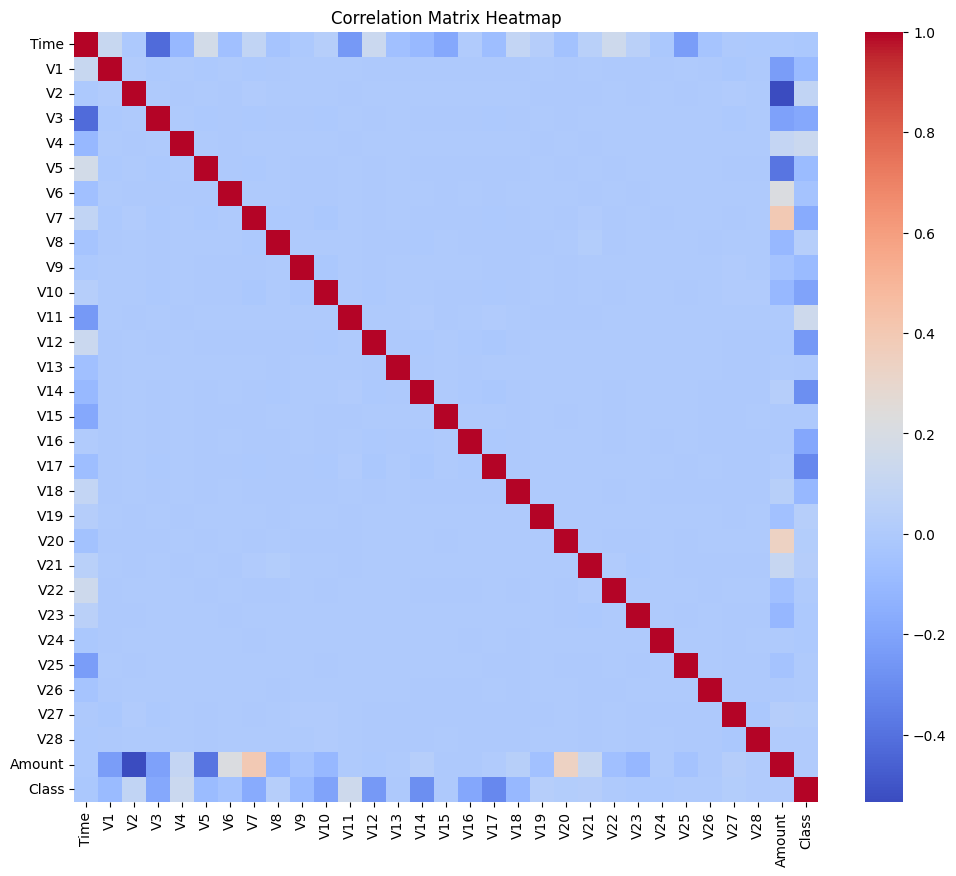

In [20]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation = data.corr()
sns.heatmap(correlation, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

**Unbalanced Dataset -> This problem is handled using SMOTE (Synthetic Minority Oversampling Technique)**

# Model to Identify Fraud Transactions

In [21]:
!pip install lightgbm
!pip install imblearn

In [22]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_recall_curve, auc
from imblearn.over_sampling import SMOTE

In [23]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X = data.drop("Class", axis=1)  # Features
y = data["Class"]              # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
# Balance dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [25]:
# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

In [26]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_bal, y_train_bal)  # Train model
    y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities
    precision, recall, _ = precision_recall_curve(y_test, y_probs)  # PR curve
    auprc = auc(recall, precision)  # Area under PR curve
    print(f"{name} AUPRC: {auprc:.4f}")

Random Forest AUPRC: 0.8113
Gradient Boosting AUPRC: 0.7297
XGBoost AUPRC: 0.8004
[LightGBM] [Info] Number of positive: 226602, number of negative: 226602
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 453204, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM AUPRC: 0.7458


# Hyperparamter Tuning

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc

In [28]:
# Parameter grid (reduced for faster search)
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [29]:
# Random Forest model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [30]:
# Randomized Search with reduced iterations and folds
search = RandomizedSearchCV(
    rf, param_dist, n_iter=10, scoring='average_precision',
    cv=2, verbose=1, n_jobs=-1, random_state=42
)

In [35]:
# Subsample the data for faster training (optional)
sample_size = 250000  # Subsample size
X_train_sample = X_train_bal[:sample_size]
y_train_sample = y_train_bal[:sample_size]


In [36]:
# Fit the model
search.fit(X_train_sample, y_train_sample)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='average_precision', verbose=1)

In [37]:
from sklearn.metrics import average_precision_score
# Best parameters and score
print("Best Parameters:", search.best_params_)
best_rf = search.best_estimator_
y_pred = best_rf.predict_proba(X_test)[:, 1]
print("Best AUPRC:", average_precision_score(y_test, y_pred))

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Best AUPRC: 0.8200731494003278


# Finding Accuracy of the Model

In [39]:
# Reinitialize Random Forest with the best parameters
from sklearn.ensemble import RandomForestClassifier
best_model = RandomForestClassifier(
    n_estimators=300, 
    min_samples_split=2, 
    min_samples_leaf=2, 
    max_depth=None, 
    random_state=42
)

In [44]:
from sklearn.metrics import accuracy_score
# Train the model on the balanced training data
best_model.fit(X_train_bal, y_train_bal)

RandomForestClassifier(min_samples_leaf=2, n_estimators=300, random_state=42)

In [45]:
# Predict on the test data
y_pred_test = best_model.predict(X_test)

In [46]:
# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)

In [47]:
# Print accuracy
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9994889507630493


# Precision Recall Curve

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

In [51]:
# Get predicted probabilities for the positive class
y_prob_test = best_model.predict_proba(X_test)[:, 1]

In [52]:
# Compute precision, recall, and thresholds
precision, recall, _ = precision_recall_curve(y_test, y_prob_test)

In [53]:
# Calculate AUPRC
auprc = auc(recall, precision)

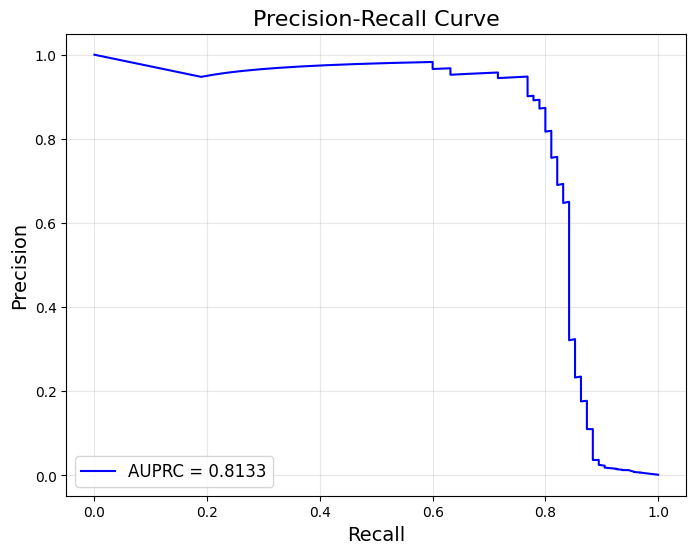

In [54]:
# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUPRC = {auprc:.4f}', color='blue')
plt.title('Precision-Recall Curve', fontsize=16)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Fraud Detection Test Case

In [73]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
# Input query for fraud detection
def predict_fraud_input(model):
    print("Enter transaction details:")
    # Collect user inputs for features
    time = float(input("Time: "))
    amount = float(input("Amount: "))
    v_features = [float(input(f"V{i}: ")) for i in range(1, 29)]  # Inputs for V1 to V28
    # Prepare input for prediction
    input_features = [time] + v_features + [amount]
    input_features = np.array(input_features).reshape(1, -1)
    # Predict fraud
    prediction = model.predict(input_features)[0]
    result = "Fraud Detected" if prediction == 1 else "No Fraud Detected"
    print(f"Output: Class = {prediction} ({result})")
# Call function with the trained model
predict_fraud_input(best_model)

Enter transaction details:


Time:  406
Amount:  0
V1:  -2.31
V2:  1.95
V3:  -1.609
V4:  3.997
V5:  -0.52219
V6:  -1.42655
V7:  -2.537
V8:  1.391667
V9:  -2.77009
V10:  -2.77
V11:  3.202
V12:  -2.899
V13:  -0.595
V14:  -4.289
V15:  0.3897
V16:  -1.14075
V17:  -2.83006
V18:  -0.01682
V19:  0.416956
V20:  0.126911
V21:  0.517232
V22:  -0.035
V23:  -0.465
V24:  0.32
V25:  0.044
V26:  0.17784
V27:  0.261145
V28:  -0.14328


Output: Class = 1 (Fraud Detected)
